<a href="https://colab.research.google.com/github/gcivil-nyu-org/fall24-monday-team3/blob/main/Lab_1_answer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1:  Simple linear regression for one independent variable

In this lab, you will load data, plot data, perform simple mathematical manipulations, and fit a simple linear regression model.  Before doing this lab, you can go through the class demo on simple linear regression for an automobile dataset.  The lab use the Ames Housing dataset which is a commonly used machine learning data set for illustrating basic concepts.  

## Loading the data

The Ames housing data set was collected in 2011 and contains information about home sales in Ames, Iowa, including the sale price and numerical and categorical information about each home. We have constructed a "reduced" version of the dataset that is available at:

https://www.chrismusco.com/machinelearning2024_grad/AmesHousing.csv.

More information about the meaning of each column can be found here: https://cran.r-project.org/web/packages/AmesHousing/AmesHousing.pdf. Note that our version of the dataset contains a subset of the columns in the original dataset and the last column, SalesPrice, is in units of 1000s of US dollars in our version.

In the lab, you will complete all the code marked `TODO`.

First, complete the following code that uses the `pd.read_csv` command to read the data from the file linked above.

In [7]:
import pandas as pd
import numpy as np
# TODO:  Complete the code
df = pd.read_csv('https://www.chrismusco.com/machinelearning2024_grad/AmesHousing.csv')

Display the first six rows of the data frame

In [8]:
df.head(6)

,Lot Area,Year Built,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Gr Liv Area,Full Bath,Half Bath,Bedroom AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,SalePrice
0,31770,1960,441.0,1080.0,1656,0,1656,1,0,3,7,2,2.0,528.0,215.0
1,11622,1961,270.0,882.0,896,0,896,1,0,2,5,0,1.0,730.0,105.0
2,14267,1958,406.0,1329.0,1329,0,1329,1,1,3,6,0,1.0,312.0,172.0
3,11160,1968,1045.0,2110.0,2110,0,2110,2,1,3,8,2,2.0,522.0,244.0
4,13830,1997,137.0,928.0,928,701,1629,2,1,3,6,1,2.0,482.0,189.9
5,9978,1998,324.0,926.0,926,678,1604,2,1,3,7,1,2.0,470.0,195.5


## Basic Manipulations on the Data

What is the shape of the data?  How many attributes are there?  How many samples?
Print a statement of the form:

    num samples=xxx, num attributes=yy

In [9]:
num_samples, num_attributes = df.shape
print(f"num samples={num_samples}, num attributes={num_attributes}")

num samples=2930, num attributes=15


The dataset contains some NaN value. Before proceeding, drop all rows from the dataframe with NaN values. There should only be a few.

In [10]:
df = df.dropna()

Create a response vector `y` with the values in the column `SalePrice`.  The vector `y` should be a 1D `numpy.ndarray` structure.

In [11]:
# TODO
y = df['SalePrice'].values
y = np.ravel(y)


Use the response vector `y` to find the mean house price in thousands and the fraction of homes that are above $120k. Print and label your results.

In [12]:
mean_houseprice = y.mean() / 1000

above_120k = np.sum(y > 120) / len(y)


print(f"Mean house price (in thousands): {mean_houseprice:.2f}")
print(f"Fraction of homes above $120k: {above_120k:.2f}")

Mean house price (in thousands): 0.18
Fraction of homes above $120k: 0.82


## Visualizing the Data

Load the `matplotlib` package with the following commands.

In [13]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

Similar to the `y` vector, create a predictor vector `x` containing the values in the `TotRms AbvGrd` column, which represents the total number of non-basement rooms in the home.

In [14]:
# TODO
x = df['TotRms AbvGrd'].values


Create a scatter plot of the price vs. the `TotRms AbvGrd` attribute.  Label the axes with reasonable labels so that someone else can understand the plot.

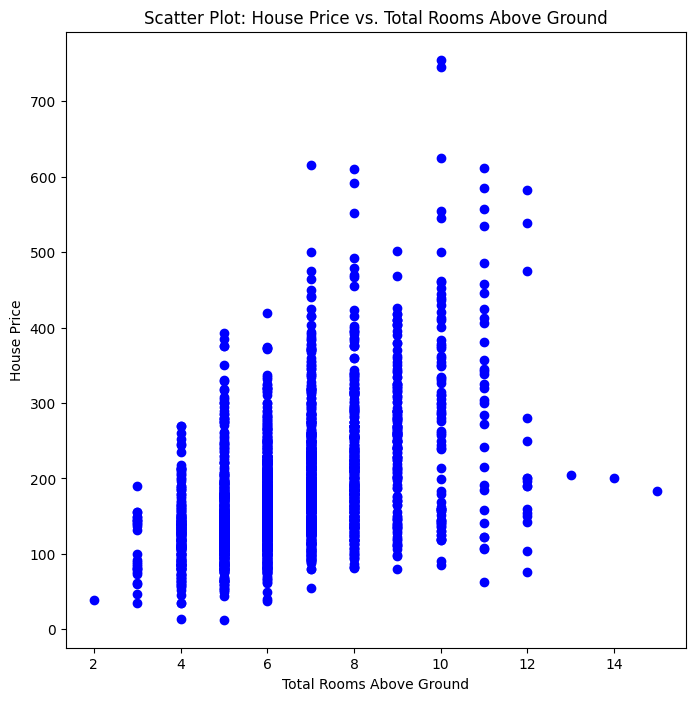

In [15]:
plt.figure(figsize=(8, 8))
plt.scatter(x, y, color='blue')

plt.xlabel('Total Rooms Above Ground')
plt.ylabel('House Price')

plt.title('Scatter Plot: House Price vs. Total Rooms Above Ground')

plt.show()

## Fitting a Simple Linear Model

We will write a simple function to perform a linear fit under the squared loss function. Use the formulae given in the class to compute the optimal parameters $\beta_0,\beta_1$ in the linear model $$y =\beta_0 + \beta_1 x$$ as well as the optimal loss $\sum_{i=1}^n (y_i - \beta_0 - \beta_1 x)^2$.

In [16]:
def fit_linear(x,y):
    """
    Given vectors of data points (x,y), performs a fit for the linear model:
       y = beta0 + beta1*x,
    The function returns beta0, beta1, and loss, where loss is the sum-of-squares loss of.
    """

    x_mean = np.mean(x)
    y_mean = np.mean(y)

    covariance_xy = np.mean((x - x_mean) * (y - y_mean))
    variance_x = np.mean((x - x_mean) ** 2)

    beta1 = covariance_xy / variance_x
    beta0 = y_mean - beta1 * x_mean
    loss = np.sum((y - (beta0 + beta1 * x))**2)
    return beta0, beta1, loss

Using the function `fit_linear` above, print the values `beta0`, `beta1` and `loss` for the linear model of price vs. number of rooms.

In [17]:
beta0, beta1, loss = fit_linear(x, y)

Replot the scatter plot above, but now with the regression line.  You can create the regression line by creating points `yp` that are the predicted values for each value in `x`, according to our linear model. Plot as a line, not a scatter plot.

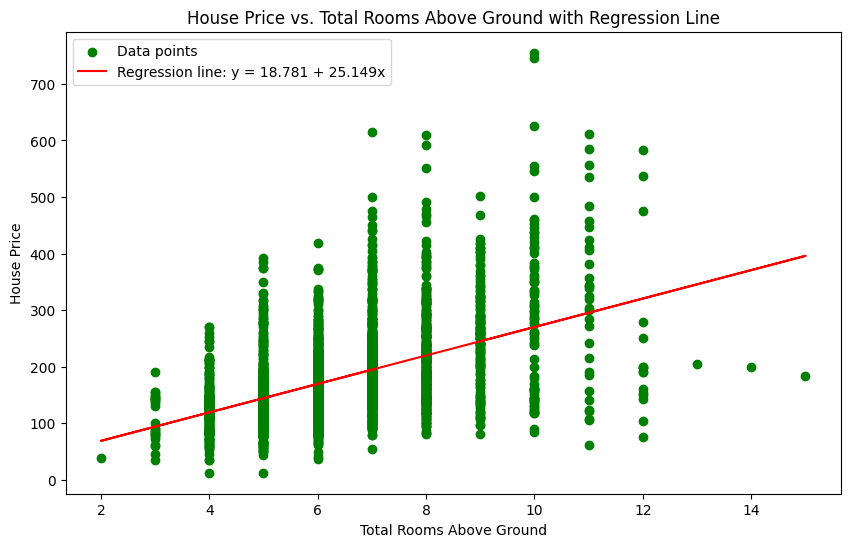

In [21]:
yp = beta0 + beta1 * x

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='green', label='Data points')
plt.plot(x, yp, color='red', label=f'Regression line: y = {beta0:.3f} + {beta1:.3f}x')

plt.xlabel('Total Rooms Above Ground')
plt.ylabel('House Price')

plt.title('House Price vs. Total Rooms Above Ground with Regression Line')
plt.legend()

plt.show()

# Part 2:  Compare different dependent variables


We next compute the squared loss for all the predictors and output the values in a table. Your table should look like the following, where each entry in the first column is the attribute name and the second column is the squared loss.

    Lot Area           XXXXX
    Overall Qual       XXXXX
    Overall Cond       XXXXX
    ...         ...

You will need to write a loop to perform this task.

What variable does the best job predicting house price?

In [36]:

# Number of bedrooms above ground does the best job in predicting house price since it has the lowest squared loss value

predictors = [col for col in df if col != 'SalePrice']

loss_dict = {}

for predictor in predictors:
    x = df[predictor].values
    beta0, beta1, loss = fit_linear(x, y)
    loss_dict[predictor] = loss


total_losses = pd.DataFrame(list(loss_dict.items()), columns=['Attribute', 'Squared Loss']).sort_values(by='Squared Loss')

print(total_losses)

        Attribute  Squared Loss
6     Gr Liv Area  9.349293e+06
12    Garage Cars  1.084347e+07
13    Garage Area  1.102283e+07
3   Total Bsmt SF  1.121338e+07
4      1st Flr SF  1.146354e+07
1      Year Built  1.285760e+07
7       Full Bath  1.312070e+07
10  TotRms AbvGrd  1.410163e+07
11     Fireplaces  1.447840e+07
8       Half Bath  1.716632e+07
5      2nd Flr SF  1.732564e+07
0        Lot Area  1.735555e+07
2     Bsmt Unf SF  1.805704e+07
9   Bedroom AbvGr  1.829628e+07


**TODO:** Describe in words the meaning of the most predictive variable for housing price.  The variable that would have the highest influence on the SalesPrice of the house would be the mose predictive variable.

# Part 3:  Compare different loss functions

## A Brute force algorithm for squared loss

Your code in `fit_linear` relies on the closed form expressions for the optimal $\beta_0$ and $\beta_1$, which we derived in class. However, if you did not know these formulas, you could have approximately minimized the loss function by brute force searching over a grid of possible values for $\beta_0$ and $\beta_1$.

For example, we could try out all combinations of parameters where $\beta_0$ is in `np.arange(-50,50,.1)` and $\beta_1$ is in `np.arange(-1,1,.005)`

Write a function which takes this approach to find a $\beta_0$ and $\beta_1$ which approximately minimize the squared loss: $\sum_{i=1}^n (y_i - \beta_0 - \beta_1 x)^2$

In [41]:
def fit_approx(x,y):
    """
    Given vectors of data points (x,y), performs an *approximate* fit for the linear model:
       y = beta0 + beta1*x,
    under the sum-of-squares loss. The min_loss returned is the lost of the best beta0 and beta1 you found.
    """
    beta0_range = np.arange(-50, 50, 0.1)
    beta1_range = np.arange(-1, 1, 0.005)

    best_0 = None
    best_1 = None
    min_loss = float('inf')

    for beta0 in beta0_range:
        for beta1 in beta1_range:
            y_pred = beta0 + beta1 * x
            loss = np.sum((y - y_pred) ** 2)

        if loss < min_loss:
            min_loss = loss
            best_0 = beta0
            best_1 = beta1

    return best_0, best_1, min_loss

Compare the output of `fit_approx` and `fit_linear` with `y` being `SalePrice` and `x` being the `Gr Liv Area` variable from our dataset. You should do so:
* quantitatively, by printing the loss that each approach achieves
* and visually, by plotting the different fit lines obtained.

Closed-form (fit_linear) Loss: 11022825.044525307
Brute-force (fit_approx) Loss: 256828725.69482964


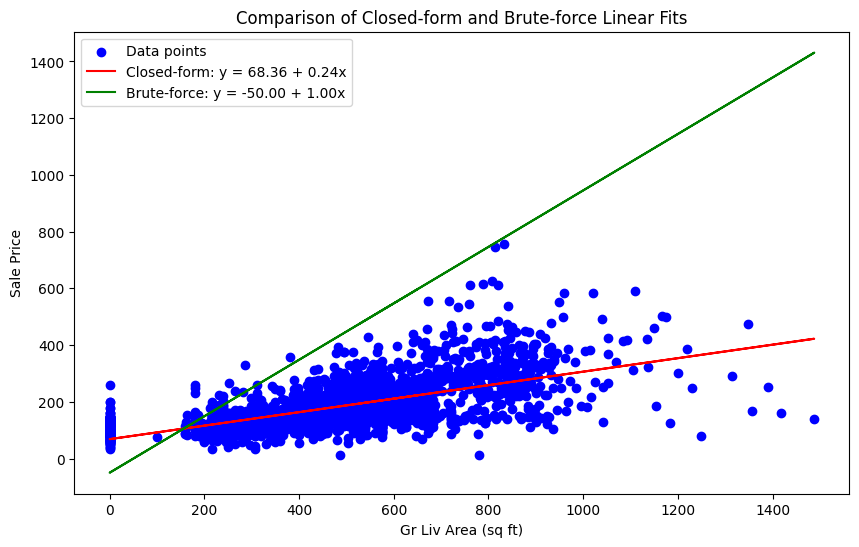

In [44]:
beta0_linear, beta1_linear, loss_linear = fit_linear(x, y)
beta0_approx, beta1_approx, loss_approx = fit_approx(x, y)

print(f"Closed-form (fit_linear) Loss: {loss_linear}")
print(f"Brute-force (fit_approx) Loss: {loss_approx}")

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Data points')


y_pred_linear = beta0_linear + beta1_linear * x
plt.plot(x, y_pred_linear, color='red', label=f'Closed-form: y = {beta0_linear:.2f} + {beta1_linear:.2f}x')


y_pred_approx = beta0_approx + beta1_approx * x
plt.plot(x, y_pred_approx, color='green', label=f'Brute-force: y = {beta0_approx:.2f} + {beta1_approx:.2f}x')

plt.xlabel('Gr Liv Area (sq ft)')
plt.ylabel('Sale Price')
plt.title('Comparison of Closed-form and Brute-force Linear Fits')
plt.legend()
plt.show()

## Extending to different loss functions

One benefit of the above approach is that is easily extends to different loss funtions. Write functions which find an approximately optimal $\beta_0$ and $\beta_1$ for
* minimizing the $\ell_1$ (least absolute deviations) loss: $\sum_{i=1}^n |y_i - \beta_0 - \beta_1 x|$
* minimizing the $\ell_\infty$ (max) loss: $\max_i |y_i - \beta_0 - \beta_1 x|$


In [60]:
def fit_approx_l1(x,y):
    """
    Given vectors of data points (x,y), performs an *approximate* fit for the linear model:
       y = beta0 + beta1*x,
    under the least absolute deviations loss.
    """

    beta_0_range = np.arange(-50, 50, 0.1)
    beta_1_range = np.arange(-1, 1, 0.005)

    beta0 = None
    beta1 = None
    min_loss = float('inf')

    for beta_0 in beta_0_range:
        for beta_1 in beta_1_range:
            y_pred = beta_0 + beta_1 * x
            l1_loss = np.sum(np.abs(y - y_pred))

            if l1_loss < min_loss:
                min_loss = l1_loss
                beta0 = beta_0
                beta1 = beta_1


    return beta0, beta1, min_loss

In [63]:
def fit_approx_max(x,y):
    """
    Given vectors of data points (x,y), performs an *approximate* fit for the linear model:
       y = beta0 + beta1*x,
    under the max loss.
    """
    beta_0_range = np.arange(-50, 50, 0.1)
    beta_1_range = np.arange(-1, 1, 0.005)

    beta0 = None
    beta1 = None
    min_loss = float('inf')


    for beta_0 in beta_0_range:
        for beta_1 in beta_1_range:
            y_pred = beta_0 + beta_1 * x
            loss = np.max(np.abs(y - y_pred))

            if linf_loss < min_loss:
                min_loss = loss
                beta0 = beta_0
                beta1 = beta_1


    return beta0, beta1, min_loss

**TODO:** Use your algorithm to obtain 3 different linear fits for `SalePrice` with predictor variable `Gr Liv Area`, one for squared loss, one for $\ell_1$ loss, and one for $\ell_\infty$ loss. Plot the linear fits (along with the data scatter plot) on a single figure and use a legend to indicate which fit corresponds to which loss.

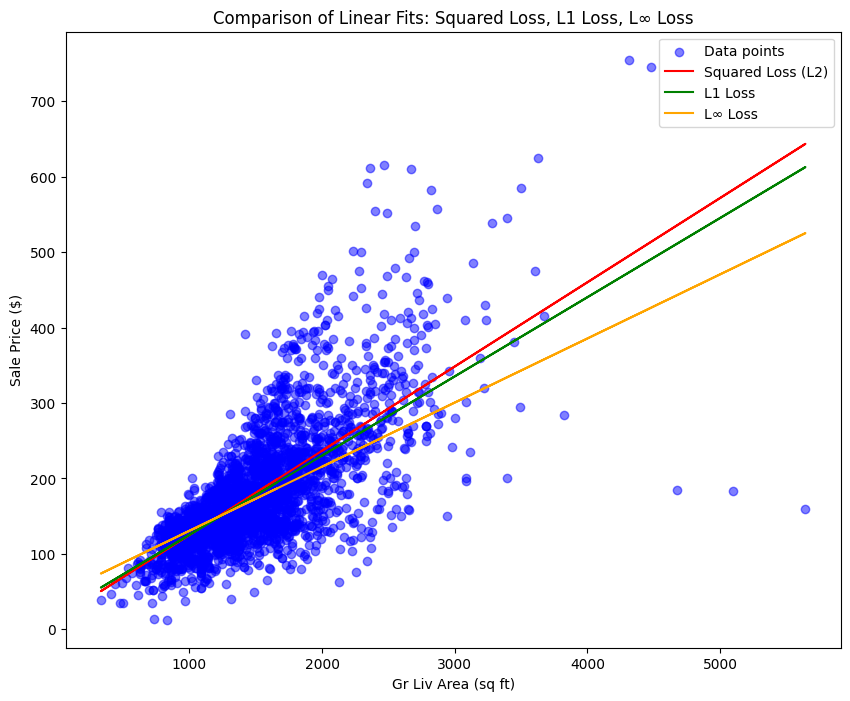

In [53]:

x_new = df['Gr Liv Area'].values
y_new = df['SalePrice'].values


beta0_linear, beta1_linear, loss_linear = fit_linear(x_new, y_new)
beta0_l1, beta1_l1, l1_loss = fit_approx_l1(x_new, y_new)
beta0_linf, beta1_linf, linf_loss = fit_approx_linf(x_new, y_new)

y_pred_linear = beta0_linear + beta1_linear * x_new
y_pred_l1 = beta0_l1 + beta1_l1 * x_new
y_pred_linf = beta0_linf + beta1_linf * x_new


plt.figure(figsize=(10, 8))


plt.scatter(x_new, y_new, color='blue', label='Data points', alpha=0.5)


plt.plot(x_new, y_pred_linear, color='red', label='Squared Loss (L2)')
plt.plot(x_new, y_pred_l1, color='green', label='L1 Loss')
plt.plot(x_new, y_pred_linf, color='orange', label='L∞ Loss')


plt.xlabel('Gr Liv Area (sq ft)')
plt.ylabel('Sale Price ($)')
plt.title('Comparison of Linear Fits: Squared Loss, L1 Loss, L∞ Loss')
plt.legend()


plt.show()


**TODO:** Repeat the process above for the `Lot Area` predictor variable, which has some more extreme outliers. Note that  this variable has a different scale than `Gr Liv Area` so you might need to adjust your approximate fit functions accordingly.

Again produce a plot that contains three different linear fits for all three different loss functions. Write 1-2 sentences of discussion about how the choice of loss function effected the fit.

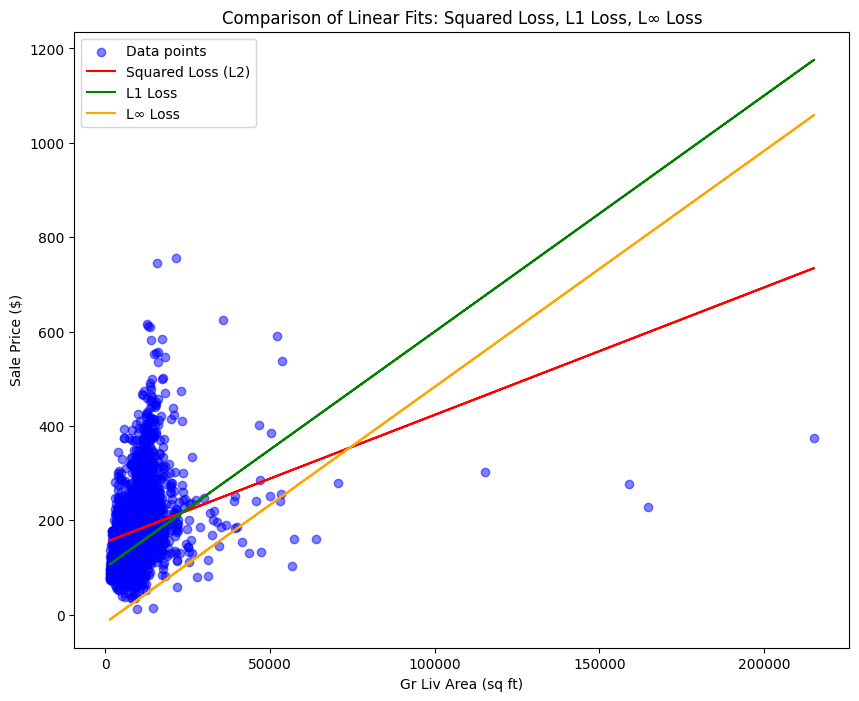

In [67]:

x_new = df['Lot Area'].values
y_new = df['SalePrice'].values


beta0_linear, beta1_linear, loss_linear = fit_linear(x_new, y_new)
beta0_l1, beta1_l1, l1_loss = fit_approx_l1(x_new, y_new)
beta0_linf, beta1_linf, linf_loss = fit_approx_linf(x_new, y_new)

y_pred_linear = beta0_linear + beta1_linear * x_new
y_pred_l1 = beta0_l1 + beta1_l1 * x_new
y_pred_linf = beta0_linf + beta1_linf * x_new


plt.figure(figsize=(10, 8))


plt.scatter(x_new, y_new, color='blue', label='Data points', alpha=0.5)


plt.plot(x_new, y_pred_linear, color='red', label='Squared Loss (L2)')
plt.plot(x_new, y_pred_l1, color='green', label='L1 Loss')
plt.plot(x_new, y_pred_linf, color='orange', label='L∞ Loss')


plt.xlabel('Gr Liv Area (sq ft)')
plt.ylabel('Sale Price ($)')
plt.title('Comparison of Linear Fits: Squared Loss, L1 Loss, L∞ Loss')
plt.legend()


plt.show()
